### Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

from mysql.connector import connect

### Kết nối CSDL

In [2]:
host_ = 'phpmyadmin.laptrinhphp.net'
user_ = 'hv'
password_ = '123456'
database_ = 'gd_testdb'
port_ = '3306'

conn = connect(host=host_, user=user_, password=password_, database=database_, port=port_, charset='utf8')

### Thực hiện truy vấn và lưu kết quả

In [3]:
cur = conn.cursor()

In [4]:
sql = "SELECT * FROM menu" # đọc bảng menu
cur.execute(sql)

In [5]:
data = cur.fetchall()
df = pd.DataFrame(data, columns=cur.column_names)

In [6]:
conn.close()

### Phân tích

In [7]:
df.shape

(260, 25)

In [8]:
df.dtypes

ID                                int64
Category                         object
Item                             object
Serving Size                     object
Calories                          int64
Calories from Fat                 int64
Total Fat                         int64
Total Fat (% Daily Value)         int64
Saturated Fat                     int64
Saturated Fat (% Daily Value)     int64
Trans Fat                         int64
Cholesterol                       int64
Cholesterol (% Daily Value)       int64
Sodium                            int64
Sodium (% Daily Value)            int64
Carbohydrates                     int64
Carbohydrates (% Daily Value)     int64
Dietary Fiber                     int64
Dietary Fiber (% Daily Value)     int64
Sugars                            int64
Protein                           int64
Vitamin A (% Daily Value)         int64
Vitamin C (% Daily Value)         int64
Calcium (% Daily Value)           int64
Iron (% Daily Value)              int64


In [9]:
df.duplicated().any() # không có dữ liệu bị trùng

False

In [10]:
df.isnull().sum() # không có dữ liệu bị thiếu

ID                               0
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [11]:
# chọn các cột cần thiết
cols = ['Category','Item','Calories','Total Fat','Cholesterol','Sodium','Sugars','Protein']
df = df[cols]

In [12]:
df.head()

,Category,Item,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein
0,Breakfast,Egg McMuffin,300,13,260,750,3,17
1,Breakfast,Egg White Delight,250,8,25,770,3,18
2,Breakfast,Sausage McMuffin,370,23,45,780,2,14
3,Breakfast,Sausage McMuffin with Egg,450,28,285,860,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,23,50,880,2,21


In [13]:
df.describe() # thống kê mô tả

,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,14.211538,54.942308,495.750000,29.423077,13.338462
std,240.269886,14.169052,87.269257,577.026323,28.679797,11.426146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,2.750000,5.000000,107.500000,5.750000,4.000000
50%,340.000000,11.000000,35.000000,190.000000,17.500000,12.000000
75%,500.000000,22.250000,65.000000,865.000000,48.000000,19.000000
max,1880.000000,118.000000,575.000000,3600.000000,128.000000,87.000000


In [14]:
df.corr() # xem các hệ số tương quan

,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein
Calories,1.000000,0.904809,0.596399,0.712309,0.259598,0.787847
Total Fat,0.904809,1.000000,0.680724,0.846326,-0.114930,0.808638
Cholesterol,0.596399,0.680724,1.000000,0.624362,-0.135518,0.561561
Sodium,0.712309,0.846326,0.624362,1.000000,-0.426536,0.869802
Sugars,0.259598,-0.114930,-0.135518,-0.426536,1.000000,-0.179940
Protein,0.787847,0.808638,0.561561,0.869802,-0.179940,1.000000


In [15]:
df['Category'].nunique() # có bao nhiêu loại?

9

In [16]:
df['Category'].unique() # in ra các loại

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [17]:
df['Category'].value_counts() # thống kê đếm theo loại

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

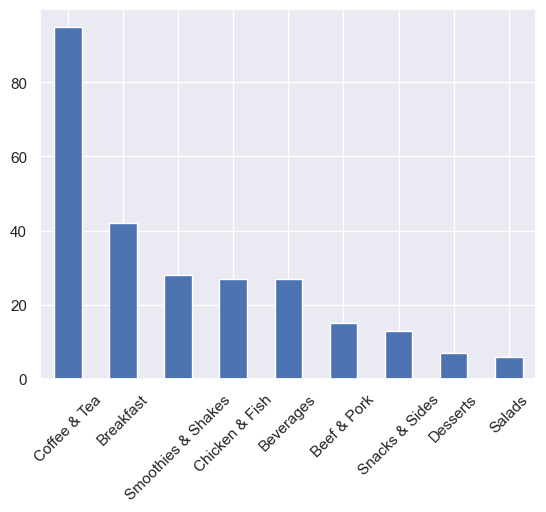

In [18]:
df['Category'].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.show()

In [19]:
# tính trung bình lượng đường và muối ăn theo loại
df_ = df.groupby('Category')[['Sodium','Sugars']].mean()

In [20]:
# sắp trung bình lượng muối ăn giảm dần
df_.sort_values(by='Sodium', ascending=False)

,Sodium,Sugars
Category,,
Chicken & Fish,1257.777778,7.333333
Breakfast,1211.071429,8.261905
Beef & Pork,1020.666667,8.800000
Salads,588.333333,6.833333
Snacks & Sides,395.769231,4.076923
Smoothies & Shakes,183.571429,77.892857
Coffee & Tea,136.894737,39.610526
Desserts,117.142857,26.142857
Beverages,41.481481,27.851852


In [21]:
# sắp trung bình lượng đường giảm dần
df_.sort_values(by='Sugars', ascending=False)

,Sodium,Sugars
Category,,
Smoothies & Shakes,183.571429,77.892857
Coffee & Tea,136.894737,39.610526
Beverages,41.481481,27.851852
Desserts,117.142857,26.142857
Beef & Pork,1020.666667,8.800000
Breakfast,1211.071429,8.261905
Chicken & Fish,1257.777778,7.333333
Salads,588.333333,6.833333
Snacks & Sides,395.769231,4.076923


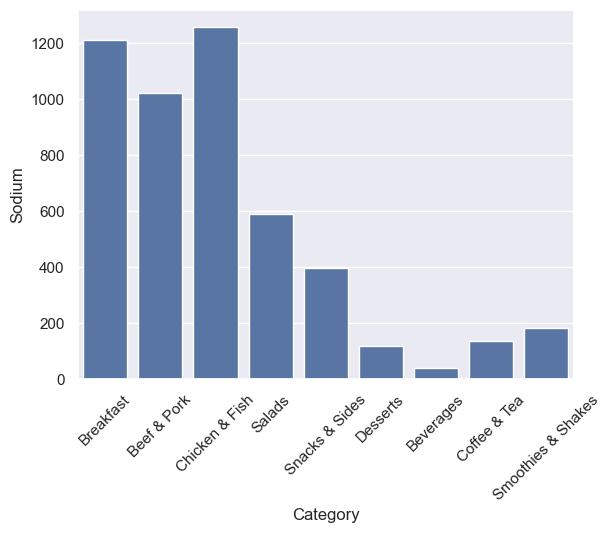

In [22]:
sns.barplot(data=df, x='Category', y='Sodium', errorbar=None)
plt.xticks(rotation=45)
plt.show()

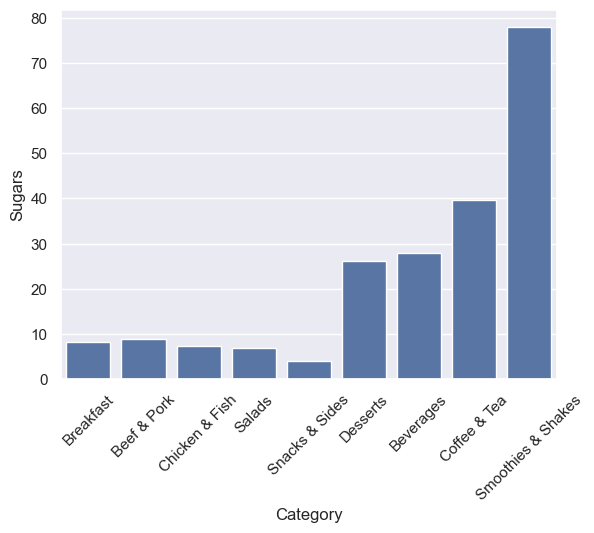

In [23]:
sns.barplot(data=df, x='Category', y='Sugars', errorbar=None)
plt.xticks(rotation=45)
plt.show()

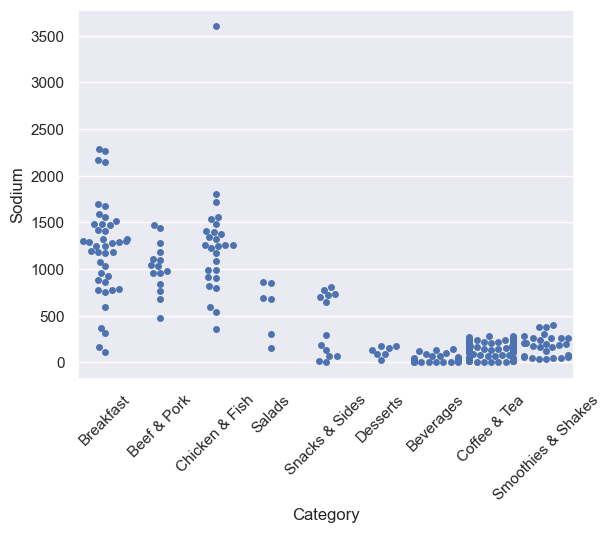

In [24]:
sns.swarmplot(data=df, x='Category', y='Sodium')
plt.xticks(rotation=45)
plt.show()

In [25]:
df[df['Sodium']==df['Sodium'].max()][['Category','Item','Sodium']] # cho biết món có nhiều muối nhất

,Category,Item,Sodium
82,Chicken & Fish,Chicken McNuggets (40 piece),3600


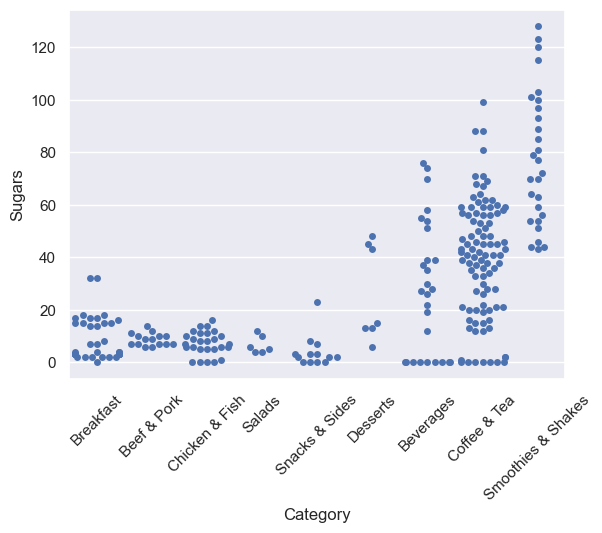

In [26]:
sns.swarmplot(data=df, x='Category', y='Sugars')
plt.xticks(rotation=45)
plt.show()

In [27]:
df[df['Sugars']==df['Sugars'].max()][['Category','Item','Sugars']] # cho biết món có nhiều đường nhất

,Category,Item,Sugars
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),128


In [28]:
df[['Calories','Total Fat']].corr()

,Calories,Total Fat
Calories,1.000000,0.904809
Total Fat,0.904809,1.000000


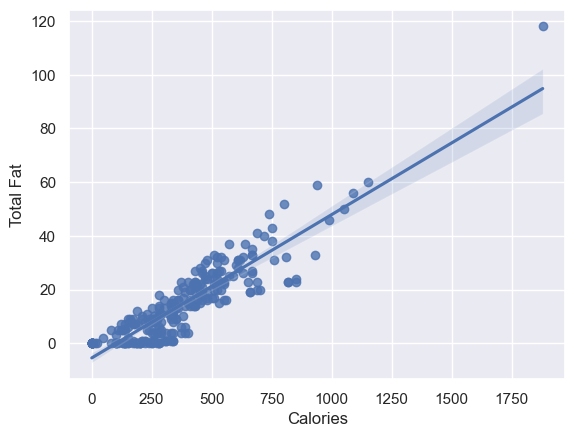

In [29]:
# Biểu đồ biểu diễn hồi quy tuyến tính giữa Calories và Total Fat
sns.regplot(data=df, x='Calories', y='Total Fat')
plt.show()